In [1]:
import pandas as pd
import geopandas as gp 
import matplotlib as plt

In [2]:
from config import *
acsData = pd.read_pickle(sharedFolder + 'ACS_data.pkl')
print(acsData.columns)
Liminal = pd.read_pickle(sharedFolder + 'gdf2019.pkl')

acsData10 = acsData[acsData['year'] == 2010].drop(columns='year')
acsData15 = acsData[acsData['year'] == 2015].drop(columns='year')
acsData19 = acsData[acsData['year'] == 2019].drop(columns='year')
acsData21 = acsData[acsData['year'] == 2021].drop(columns='year')

Index(['CBSA', 'year', 'Total_Population', 'Total_Male_Pop',
       'Total_Female_Pop', 'Median_Age', 'M_Median_Age', 'F_Median_Age',
       'Race_white', 'Race_black', 'Race_Am_Indian', 'Race_Asian',
       'Race_Pac_Isl', 'Median_Income', 'Less_High', 'High_Equiv',
       'College_Assoc_Equiv', 'Bachelors', 'Grad_Prof',
       'Ag_For_Fish_Hunt_Mine', 'Construction', 'Manufacturing', 'Wholesale',
       'Retail', 'Trans_Ware_Util', 'Information', 'Fin_Insur_Real',
       'Fin_Insur', 'Real_Rental', 'Prof_Sci_Tech', 'Mngmt_Enter',
       'Admin_WstMngmt', 'Ed_Servc', 'Hlthcr_Social', 'Arts_Entr_Rec',
       'Accom_Food_Srvc', 'Other_Servc', 'Public_admin', 'Num_Total_Worker',
       'Num_Comp_Info_Res', 'Num_Soft_Dev', 'Num_Comp_Sys_Analyst',
       'Num_Info_Sec_Analyst', 'Num_Comp_Programmer', 'Num_Soft_Qual',
       'Num_Web_Dev', 'Sal_Avg_Occ', 'Avg_Comp_EngSci', 'Avg_Mngmt_Bus_Fin',
       'Num_Workers', 'Num_Worked_Home', 'Worked_Home_White',
       'Worked_Home_Black', 'Worked_

In [3]:
acsData21['pct_white21'] = acsData21['Race_white'] / acsData21['Total_Population']

In [4]:
acsData10['pct_white10'] = acsData10['Race_white'] / acsData10['Total_Population']

In [5]:
smaller21 = acsData21[['CBSA', 'pct_white21', 'Median_Income']]
smaller10 = acsData10[['CBSA', 'pct_white10', 'Median_Income']]                      

In [6]:
compare = pd.merge(smaller21, smaller10, on = 'CBSA')
compare = pd.merge(compare, Liminal, on='CBSA')

In [7]:
compare

,CBSA,pct_white21,Median_Income_x,pct_white10,Median_Income_y,LSAD,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NAME,geometry,metro,micro,buff,inBuff,commuteBuffCount,workingPop,commutePercent,liminal
0,10100,0.875082,41088.000000,0.943757,30244.000000,Micropolitan Statistical Area,42204,42118,42037,"Aberdeen, SD","POLYGON ((-10989736.448 5659978.604, -10990063...",False,True,"POLYGON ((-11260422.376 5673350.686, -11260422...",False,0.0,20547.0,0.000000,False
1,10140,0.850529,35999.000000,0.862495,30408.000000,Micropolitan Statistical Area,75855,76787,77038,"Aberdeen, WA","POLYGON ((-13837615.681 5982098.516, -13837721...",False,True,"POLYGON ((-14011312.614 6012982.039, -14012149...",True,6844.0,28356.0,24.135985,True
2,10180,0.746851,34969.000000,0.810653,29040.666667,Metropolitan Statistical Area,176866,177829,179308,"Abilene, TX","POLYGON ((-11148262.500 3832132.455, -11148249...",False,False,"POLYGON ((-11309677.340 3783320.344, -11309649...",True,7720.0,69422.0,11.120394,False
3,10220,0.660359,39530.000000,0.731852,27670.000000,Micropolitan Statistical Area,38087,38195,38141,"Ada, OK","POLYGON ((-10790478.575 4120536.368, -10790479...",False,True,"POLYGON ((-10951414.331 4125460.111, -10951415...",True,2106.0,15667.0,13.442267,True
4,10300,0.913897,38160.000000,0.920911,31289.000000,Micropolitan Statistical Area,99320,99202,98567,"Adrian, MI","POLYGON ((-9391131.716 5145826.837, -9391131.7...",False,True,"POLYGON ((-9552071.161 5147203.615, -9552071.5...",True,6459.0,36049.0,17.917279,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,49660,0.836297,36919.666667,0.862601,29613.000000,Metropolitan Statistical Area,540211,537837,535499,"Youngstown-Warren-Boardman, OH-PA","POLYGON ((-9017133.666 5032154.477, -9017136.6...",False,False,"POLYGON ((-9187449.917 5005143.524, -9187448.1...",True,28257.0,208376.0,13.560583,False
922,49700,0.632970,40311.000000,0.673867,30076.000000,Metropolitan Statistical Area,181458,182254,182813,"Yuba City, CA","POLYGON ((-13539095.212 4764106.072, -13539054...",False,False,"POLYGON ((-13735793.573 4749232.461, -13736149...",True,24589.0,67426.0,36.468128,False
923,49740,0.664563,33395.000000,0.753871,25846.000000,Metropolitan Statistical Area,204528,206241,207842,"Yuma, AZ","POLYGON ((-12775445.758 3848066.261, -12775405...",False,False,"POLYGON ((-12941846.948 3839265.947, -12941917...",True,10441.0,65860.0,15.853325,False
924,49780,0.913302,37890.000000,0.933799,28574.000000,Micropolitan Statistical Area,86450,86574,86113,"Zanesville, OH","POLYGON ((-9149881.580 4868949.855, -9149879.9...",False,True,"POLYGON ((-9314594.513 4866712.033, -9313763.6...",True,9978.0,34969.0,28.533844,True


In [8]:
compare['delta_pct_white'] = compare['pct_white21'] - compare['pct_white10']

In [11]:
liminal_only = compare[compare['liminal'] == True]
metro = compare[compare['metro'] == True]

In [12]:
liminal_only['delta_pct_white'].sum()/ len(liminal_only)

-0.03132400704575302

In [13]:
metro['delta_pct_white'].sum()/ len(metro)

-0.061989458456807804

<AxesSubplot:xlabel='pct_white21', ylabel='commutePercent'>

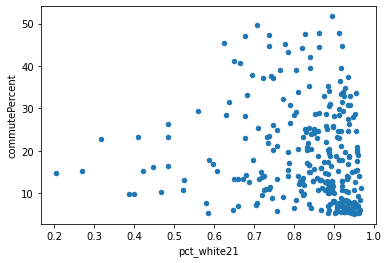

In [14]:
liminal_only.plot.scatter('pct_white21', 'commutePercent')

In [15]:
liminal_only[['pct_white21', 'commutePercent']].corr()

,pct_white21,commutePercent
pct_white21,1.000000,-0.115601
commutePercent,-0.115601,1.000000


In [16]:
acsData21[acsData21['pct_white21'] > 0.8]['Median_Income'].sum() / len(acsData21[acsData21['pct_white21'] > 0.8])

39248.250163173376

In [17]:
acsData21[acsData21['pct_white21'] < 0.8]['Median_Income'].sum() / len(acsData21[acsData21['pct_white21'] < 0.8])

38958.793576409866

In [18]:
print(liminal_only[liminal_only['pct_white21'] > 0.8]['Median_Income_x'].sum() / len(liminal_only[liminal_only['pct_white21'] > 0.8]))
print(liminal_only[liminal_only['pct_white21'] < 0.8]['Median_Income_x'].sum() / len(liminal_only[liminal_only['pct_white21'] < 0.8]))

38540.72624798712
34869.377637130805


In [19]:
print(metro[metro['pct_white21'] > 0.8]['Median_Income_x'].sum() / len(metro[metro['pct_white21'] > 0.8]))
print(metro[metro['pct_white21'] < 0.8]['Median_Income_x'].sum() / len(metro[metro['pct_white21'] < 0.8]))

43196.79761904762
47461.486717003005


In [20]:
metro[metro['pct_white21'] > 0.8]

,CBSA,pct_white21,Median_Income_x,pct_white10,Median_Income_y,LSAD,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NAME,geometry,metro,micro,buff,inBuff,commuteBuffCount,workingPop,commutePercent,liminal,delta_pct_white
163,17140,0.801998,44119.750000,0.837550,34058.375000,Metropolitan Statistical Area,2258932,2259955,2265051,"Cincinnati, OH-KY-IN","POLYGON ((-9447768.340 4707487.111, -9447822.1...",True,False,"POLYGON ((-9656278.596 4791898.426, -9656292.0...",True,829968.0,936234.0,88.649632,False,-0.035551
332,24340,0.815495,41155.500000,0.849085,31305.500000,Metropolitan Statistical Area,1088852,1091572,1094198,"Grand Rapids-Kentwood, MI","POLYGON ((-9496623.664 5277010.290, -9496755.1...",True,False,"POLYGON ((-9644270.155 5491012.778, -9637323.6...",True,433264.0,506308.0,85.573208,False,-0.033590
664,38300,0.852435,44315.142857,0.882273,32275.714286,Metropolitan Statistical Area,2369166,2365176,2349172,"Pittsburgh, PA","POLYGON ((-8963338.085 4935555.565, -8963337.3...",True,False,"POLYGON ((-9124281.728 4877997.829, -9124282.8...",True,997697.0,1088181.0,91.684839,False,-0.029838


In [21]:
def correlation (dependent, independent):
    # print(liminal_only.plot.scatter(independent, dependent))
    print(liminal_only[[independent, dependent]].corr())
    # print(metro.plot.scatter(independent, dependent))
    print(metro[[independent, dependent]].corr())

In [22]:
for elem in list(metro.columns): 
    correlation('commutePercent', elem)

                    CBSA  commutePercent
CBSA            1.000000       -0.000374
commutePercent -0.000374        1.000000
                    CBSA  commutePercent
CBSA            1.000000        0.210725
commutePercent  0.210725        1.000000
                pct_white21  commutePercent
pct_white21        1.000000       -0.115601
commutePercent    -0.115601        1.000000
                pct_white21  commutePercent
pct_white21        1.000000       -0.207395
commutePercent    -0.207395        1.000000
                 Median_Income_x  commutePercent
Median_Income_x         1.000000        0.063055
commutePercent          0.063055        1.000000
                 Median_Income_x  commutePercent
Median_Income_x         1.000000        0.188513
commutePercent          0.188513        1.000000
                pct_white10  commutePercent
pct_white10        1.000000       -0.098613
commutePercent    -0.098613        1.000000
                pct_white10  commutePercent
pct_white10        1